# Python Lab 02b: PCA ed Eigenfaces
## Francesco Della Santa, Matematica per l'Intelligenza Artificiale, Politecnico di Torino

In [3]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
%matplotlib widget
#
#
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

# Importazione del Dataset “Labeled Faces in the Wild”

Il dataset in questione è disponibile tramite il sottomodulo "datasets" di scikit-learn (come il dataset iris, wine e molti altri) e la funzione fetch_lfw_people. Documentazione completa della funzione qui: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people

Il dataset caricato dalla funzione restituisce (ormai vecchie) immagini di volti famosi.
L'oggetto restituito è della classe "Bunch" di scikit-learn, dal funzionamento simile ai dizionari (per come lo utilizzeremo, potrebbe essere di fatto un dizionario).

In [4]:
# Il codice presente in questa cella serve nel caso si verifichi un errore del tipo
#
# "URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1124)>"
#
# al momento di chiamare la funzione fetch_lfw_people di sklearn.datasets
#
# ATTENZIONE: il codice di questa cella non è quindi sempre necessario; se quindi non lo fosse, commentarlo pure.
#

import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

## Importazione di parte del dataset e prime ispezioni del contenuto

Di seguito importiamo parte del dataset, stampiamo la descrizione ufficiale fornita da scikit-learn ed esploriamo un po' il contenuto.

### Importazione e Stampa Descrizione

In [5]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

print(lfw_people['DESCR'])

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

### Visualizzazioni "Esplorative"

Prima di tutto, per comodità, salviamo in variabili apposite i dati contenuti nel simil-dizionario.

In [6]:
face_data = lfw_people['data']
face_images = lfw_people['images']
face_tnames = lfw_people['target_names']
face_targets = lfw_people['target']


Per praticità, creiamoci dei DataFrame di lavoro

**ESERCIZIO:** Completare il codice della cella seguente per creare il DataFrame "face_targets_df" avente per colonne "target", con i valori di "face_targets", e "target_names", avente come valori le stringhe di nomi in "face_tnames" corrispondenti ai valori nella colonna accanto.

In [7]:
# DataFrame delle immagini rappresentate come vettori
face_data_df = pd.DataFrame(face_data)

# DataFrame delle classi di appartenenza e dei nomi
face_targets_df = pd.DataFrame({'target': face_targets, 'target_names': [face_tnames[t] for t in face_targets]})

In [8]:
face_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,0.997386,0.996078,0.992157,0.966013,0.758170,0.569935,0.700654,0.794771,0.784314,0.767320,...,0.437909,0.426144,0.422222,0.415686,0.401307,0.393464,0.390850,0.381699,0.388235,0.380392
1,0.147712,0.197386,0.175163,0.192157,0.385621,0.473203,0.543791,0.615686,0.671895,0.694118,...,0.168627,0.239216,0.296732,0.307190,0.325490,0.410458,0.487582,0.457516,0.444444,0.535948
2,0.343791,0.394771,0.491503,0.555556,0.597386,0.611765,0.606536,0.626144,0.640523,0.652288,...,0.483660,0.430065,0.379085,0.410458,0.498039,0.448366,0.481046,0.709804,0.721569,0.716340
3,0.047059,0.016993,0.023529,0.016993,0.031373,0.230065,0.677124,0.667974,0.641830,0.400000,...,0.481046,0.749020,0.903268,0.915033,0.918954,0.925490,0.513725,0.065359,0.142484,0.201307
4,0.471895,0.458824,0.486275,0.499346,0.494118,0.513726,0.545098,0.543791,0.560784,0.581699,...,0.107190,0.062745,0.019608,0.018301,0.018301,0.039216,0.036601,0.078431,0.250980,0.278431


In [9]:
face_targets_df.head()

,target,target_names
0,5,Hugo Chavez
1,6,Tony Blair
2,3,George W Bush
3,1,Colin Powell
4,0,Ariel Sharon


 
 
 Vediamo la distribuzione dei volti all'interno del dataset.
 
 **ESERCIZIO:** Completare il codice nella cella seguente per visualizzare la distribuzione dei volti nel dataset.
 
 

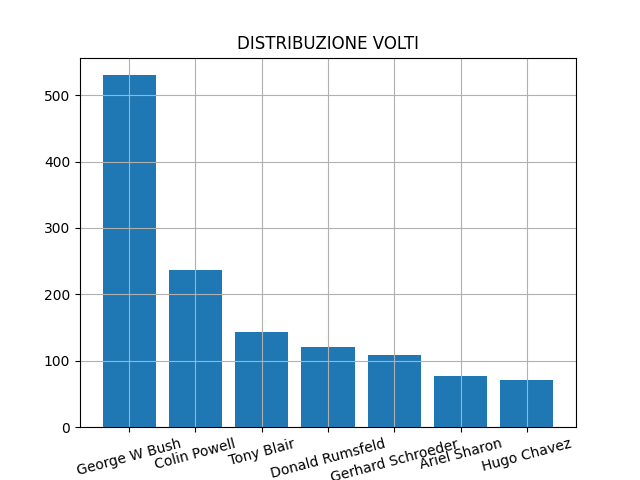

In [10]:
# Definire face_counts sfruttando il metodo "value_counts" delle Serie rispetto alla 
# colonna 'target_names' di face_targets_df
face_counts = face_targets_df['target_names'].value_counts()

plt.figure()
plt.bar(np.arange(len(face_counts.values)), face_counts.values)
plt.xticks(ticks=np.arange(len(face_counts.values)), 
           labels=face_counts.index.to_list(),
           rotation=15)
plt.title('DISTRIBUZIONE VOLTI')
plt.grid()
plt.show()

Visualizziamo alcuni dei volti, sia come immagine che come vettore.

In [11]:
# Raccogliamo gli indici corrispondenti alle varie classi in un dizionario

class_indices = {}

for name in face_tnames:
    class_indices[name] = face_targets_df.loc[face_targets_df['target_names']==name].index.to_list()

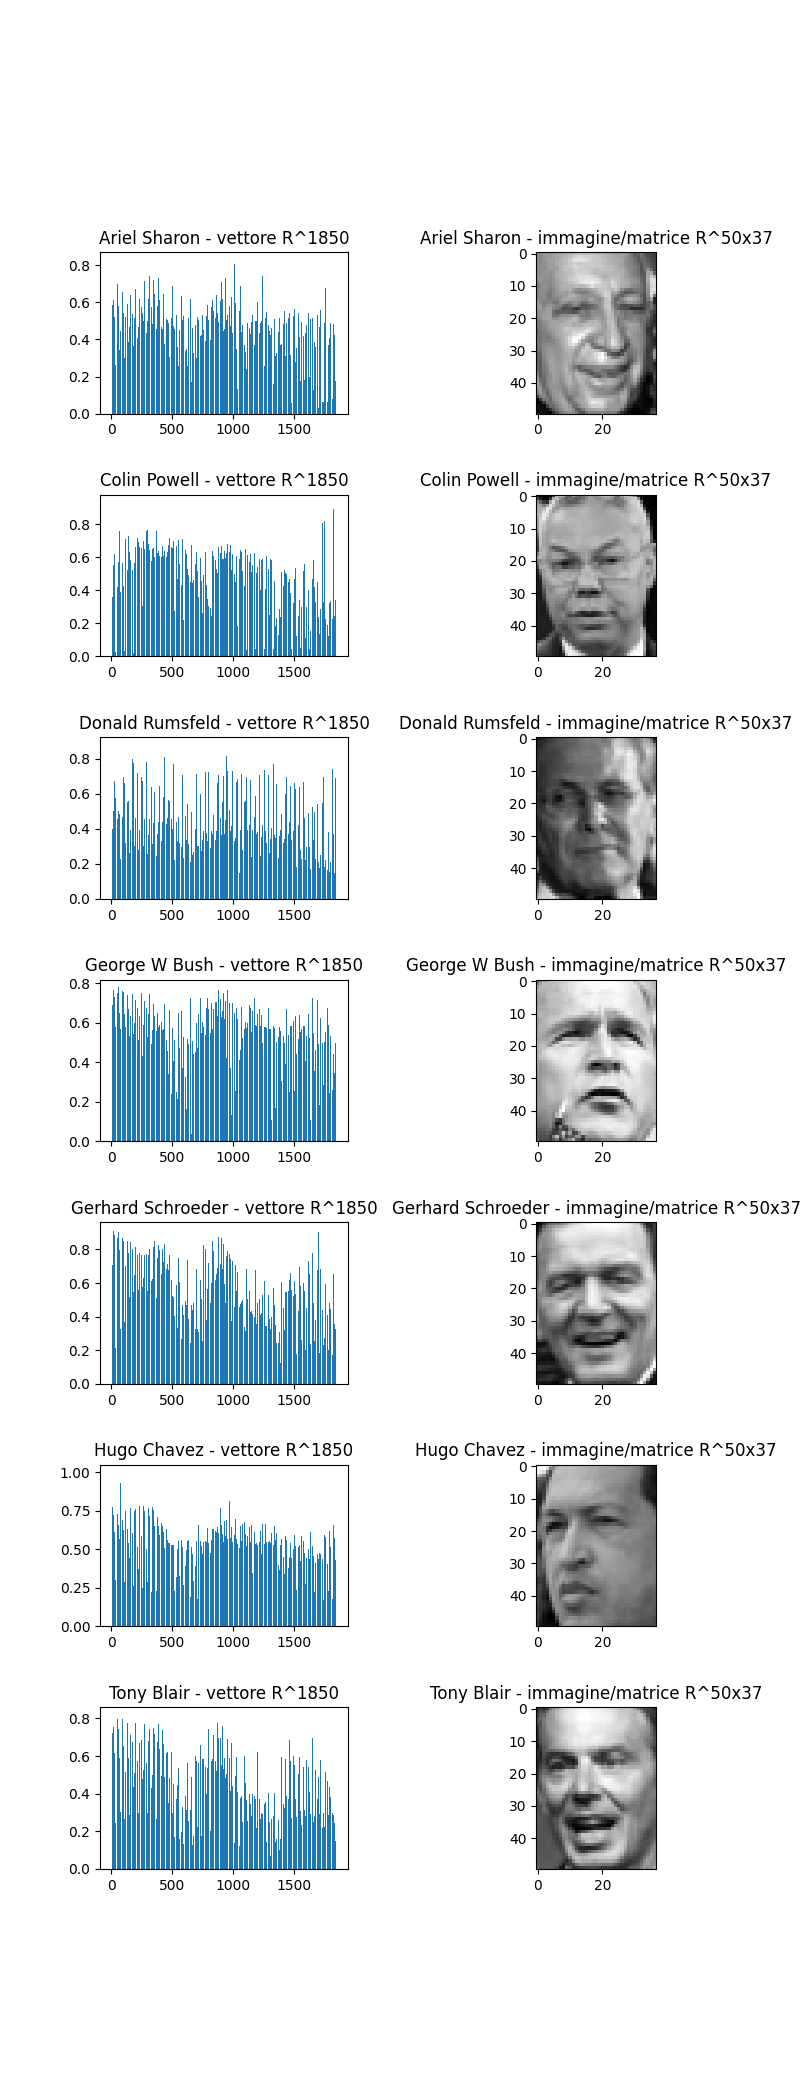

In [12]:
# Visualizziamo il primo dato per ogni classe

fig1, axs1 = plt.subplots(len(face_tnames), 2, figsize=(8, len(face_tnames) * 3))

for i in range(len(face_tnames)):
    
    name = face_tnames[i]
    first_ind = class_indices[name][0]
    
    axs1[i, 0].bar(np.arange(face_data.shape[1]), face_data[first_ind, :])
    axs1[i, 0].set_title('{} - vettore R^{}'.format(name, face_data.shape[1]))
    
    axs1[i, 1].imshow(face_images[first_ind], cmap=plt.cm.gray)
    axs1[i, 1].set_title('{} - immagine/matrice R^{}x{}'.format(name, face_images.shape[1], face_images.shape[2]))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

## PCA ed Eigenfaces

La PCA è stata applicata (soprattutto in passato, prima dell'avvento del Deep Learning) a problemi di riconoscimento facciale. Tutt'oggi può essere utile per questi scopi o, per esempio, per la compressione di immagini.

Proviamo quindi ad applicare la PCA ai vettori contenuti nella variabile "face_data".

### Indagine Preliminare sulla Varianza Spiegata

**ATTENZIONE:** in questo caso i vettori hanno come elementi i pixel delle immagini e assumono tutti valori tra 0 (nero) e 255 (bianco). Non si rende necessaria l'applicazione di uno StandardScaler (o simili).

**ESERCIZIO:** Completare il codice della cella seguente per visualizzare l'andamento della varianza spiegata (percentuale) all'aumentare delle PC considerate.


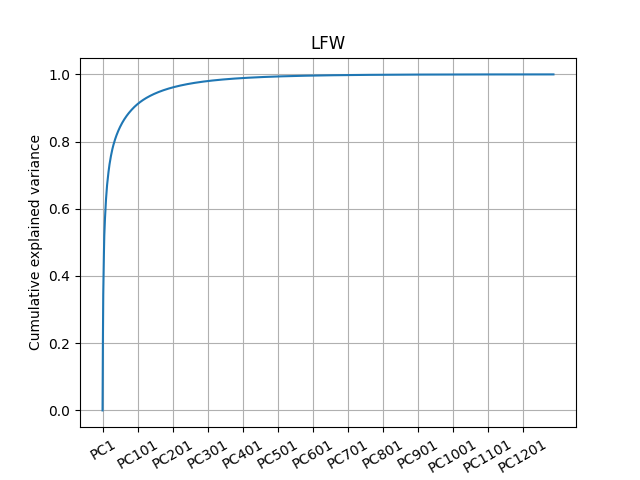

In [15]:
# Inizializzazione oggetto PCA
pca_global = PCA()
# "Fit" dell'oggetto PCA
pca_global.fit(face_data)

# Definizione di un array della varianza spiegata percentuale CUMULATIVA
expld_variance_global = np.insert(np.cumsum(pca_global.explained_variance_ratio_), 0, 0)

plt.figure()
plt.plot(expld_variance_global)
plt.title('LFW')
plt.xticks(ticks=np.arange(1, pca_global.n_components_ + 1, 100),
           labels=[f'PC{i}' for i in range(1, pca_global.n_components_ + 1, 100)],
           rotation=30)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

Guardando la curva della varianza spiegata, osserviamo che con un numero abbastanza ridotto di PC possiamo "spiegare" una buona percentuale della varianza totale.

Prendiamo come esempio per l'esercizio una percentuale di varianza totale spiegata pari all'95%.

**ESERCIZIO:** Completare il codice della cella seguente per implementare una PCA che selezioni un numero di PC corrispondenti al 95% di varianza totale spiegata.

In [16]:
pca_percentage = 0.95

pca = PCA(pca_percentage)
pca.fit(face_data)

print('Numero PC: {}'.format(pca.n_components_))
print('% Varianza Tot. Spiegata: {}'.format(pca.explained_variance_ratio_.sum()))

Numero PC: 167
% Varianza Tot. Spiegata: 0.9503055214881897


### Eigenfaces

Le cosiddette "eigenfaces" altro non sono che le PC (autovettori della matrice di covarianza del dataset) visualizzate come immagini invece che come vettori.

vmin: -0.16954076290130615 (dark purple)
vmax: 0.16954076290130615 (yellow)


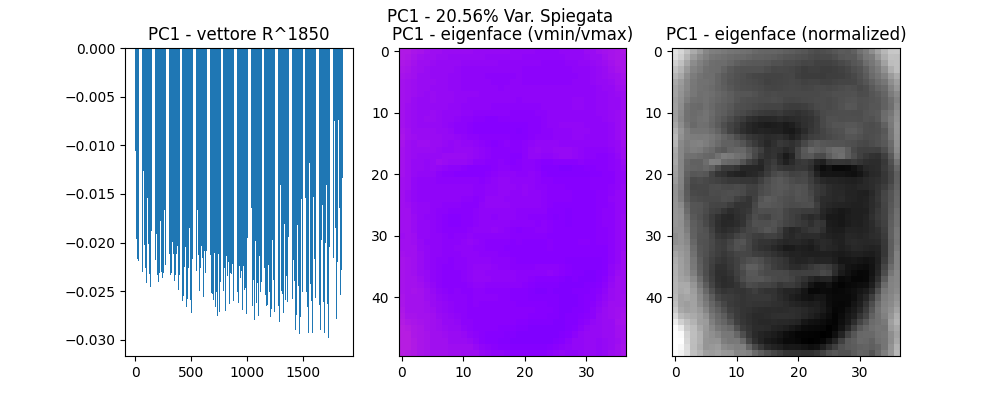

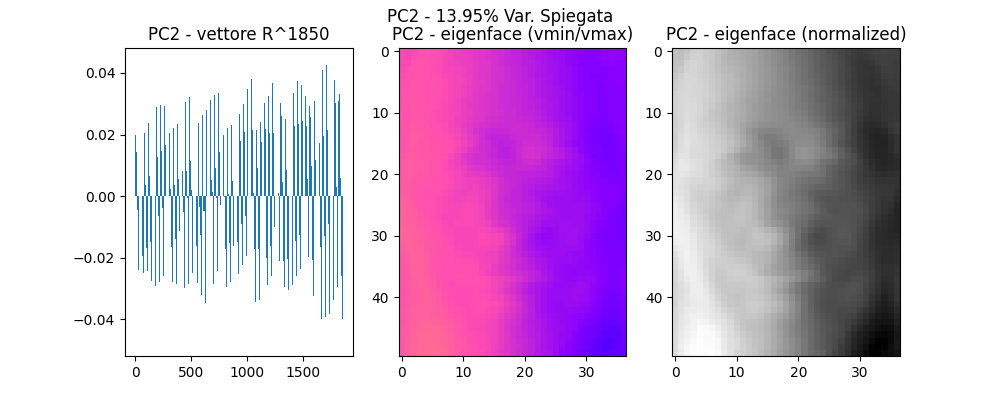

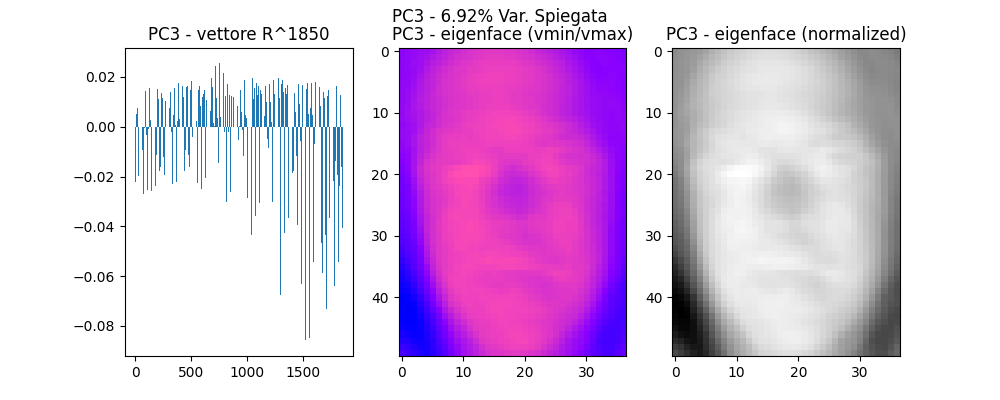

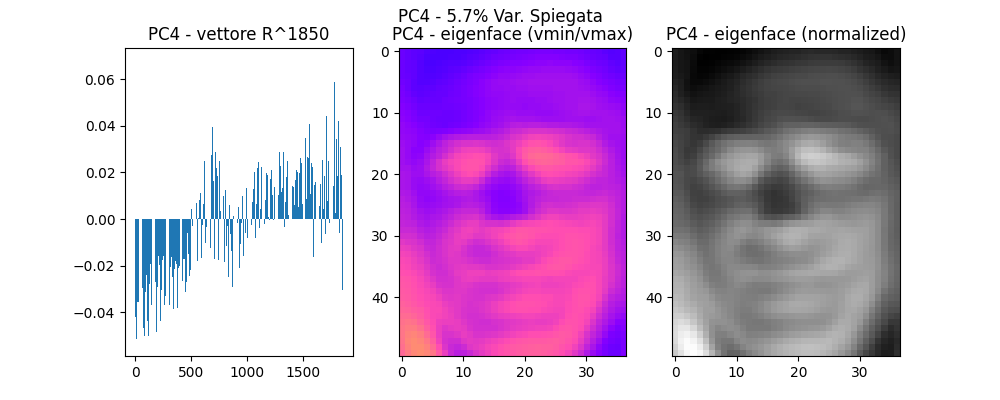

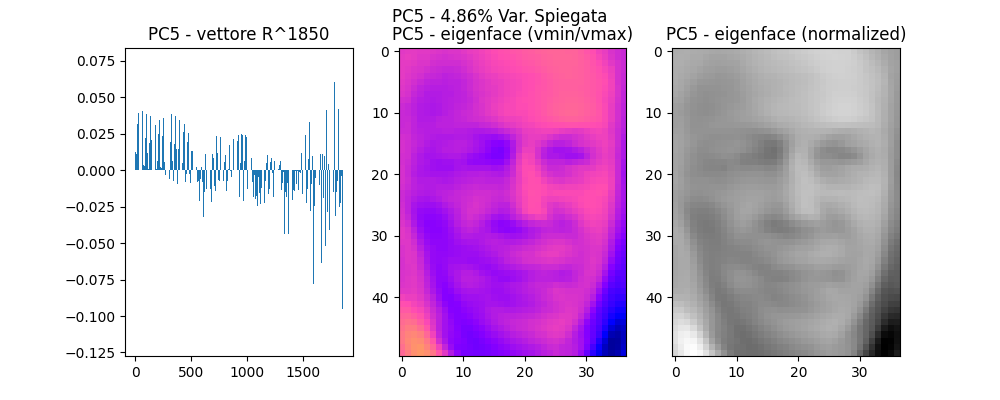

In [17]:
# Salviamo le PC "risistemate" come matrici/immagini in una lista apposita.

_, height, width = face_images.shape
eigenfaces = [pca.components_[i].reshape((height, width)) for i in range(pca.n_components_)]

vmin = pca.components_.min()
vmax = pca.components_.max()

vmin = min([vmin, -vmax, 0.0])
vmax = max([-vmin, vmax, 0.0])

print('vmin: {} (dark purple)'.format(vmin))
print('vmax: {} (yellow)'.format(vmax))

# Numero di Eigenfaces da visualizzare (non tutte per allegerire l'esecuzione dei plot)
n_pc_tosee = 5

for i in range(n_pc_tosee): 
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    axs[0].bar(np.arange(pca.components_.shape[1]), pca.components_[i, :])
    axs[0].set_title('PC{} - vettore R^{}'.format(i + 1, pca.components_.shape[1]))
    
    axs[1].imshow(eigenfaces[i], cmap=plt.cm.gnuplot2, vmin=vmin, vmax=vmax)
    axs[1].set_title('PC{} - eigenface (vmin/vmax)'.format(i + 1, height, width))
    
    axs[2].imshow(eigenfaces[i], cmap=plt.cm.gray)
    axs[2].set_title('PC{} - eigenface (normalized)'.format(i + 1, height, width))
    
    fig.suptitle('PC{} - {}% Var. Spiegata'.format(i + 1, np.around(100 * pca.explained_variance_ratio_[i], decimals=2)))
    
    plt.show()


### Ricostruzione volti da Eigenfaces

Vediamo come i volti presenti nel dataset vengono ricostruiti usando il numero di eigenfaces (cioè PC) che abbiamo selezionato (se le usassimo tutte e 1850, avremmo una ricostruzione esatta).

**ESERCIZIO:** Completare il codice seguente per la comparare le immagini originali e la loro ricostruzione fatta usando il numero di PC scelto.

Sample Indices: [ 240  999  449  269 1187  667  809 1242 1014  511  295   13  568  676
  102 1135  868 1244 1108  172  929  994  368  468  381]


C:\Users\andre\AppData\Local\Temp\ipykernel_2100\483643385.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(8, 3))


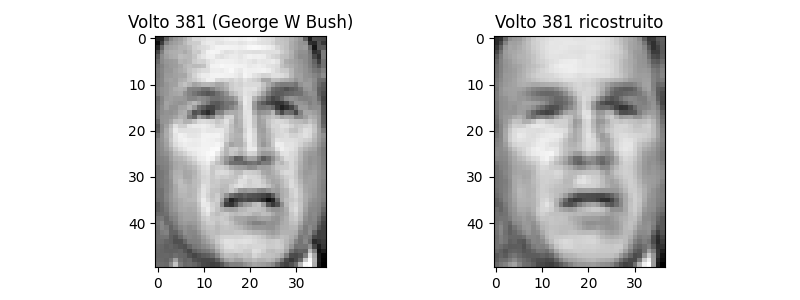

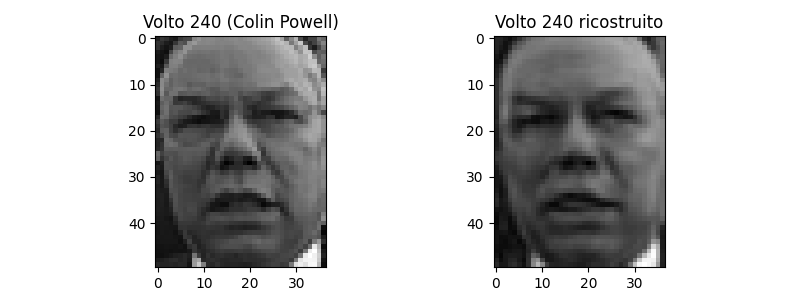

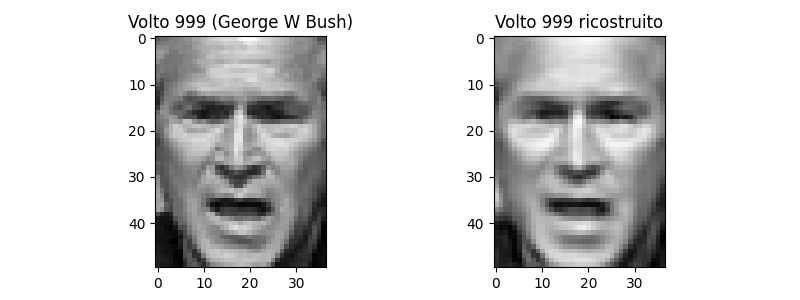

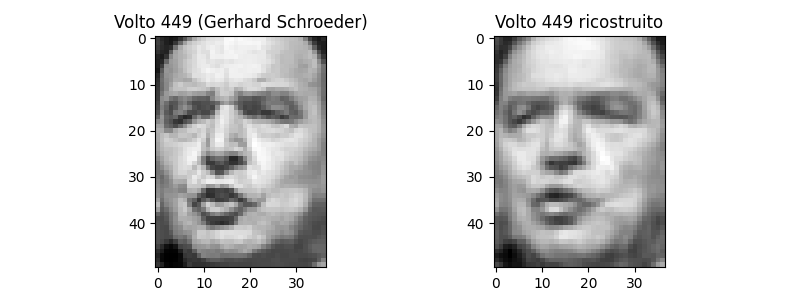

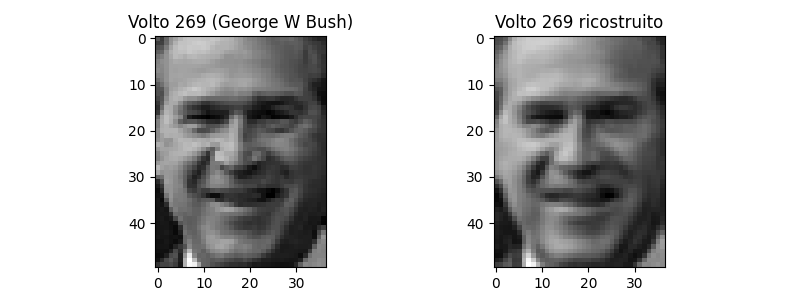

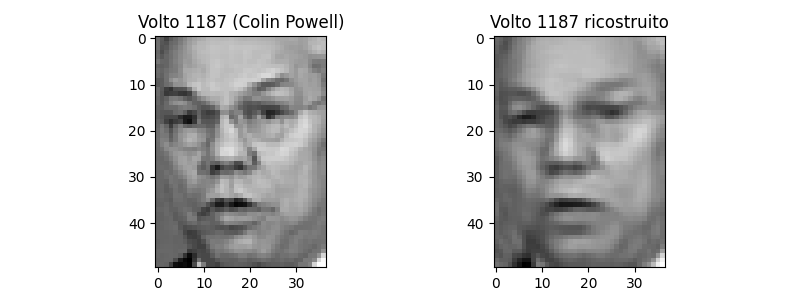

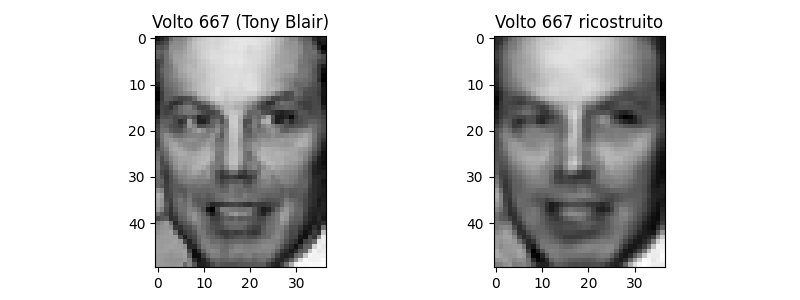

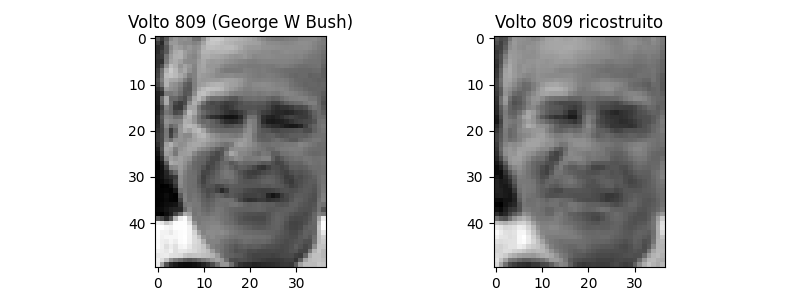

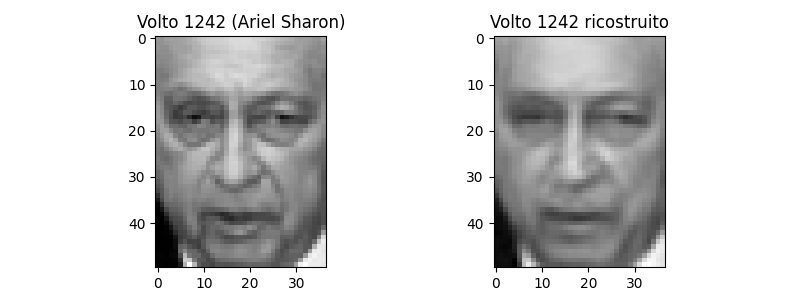

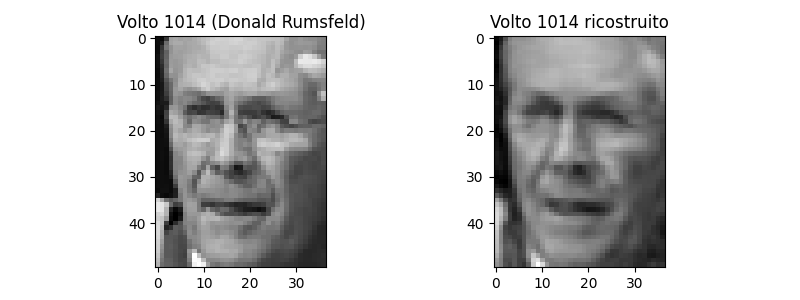

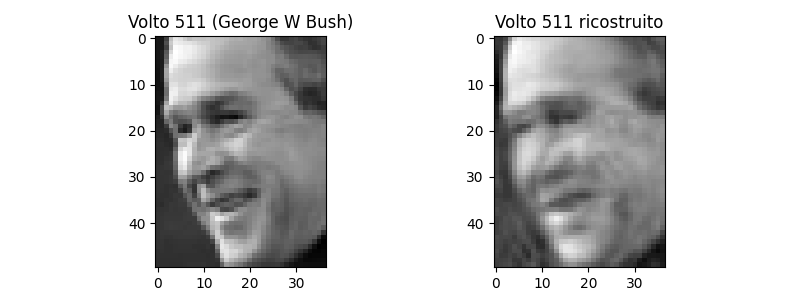

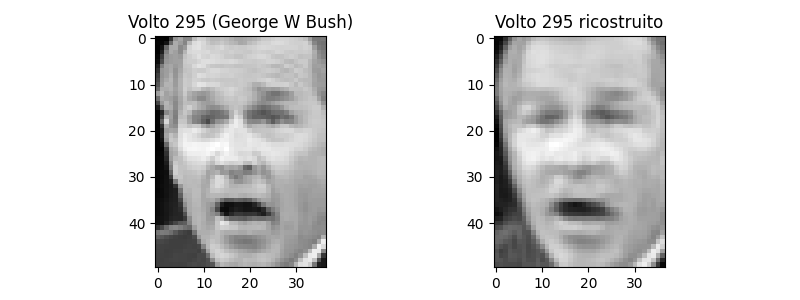

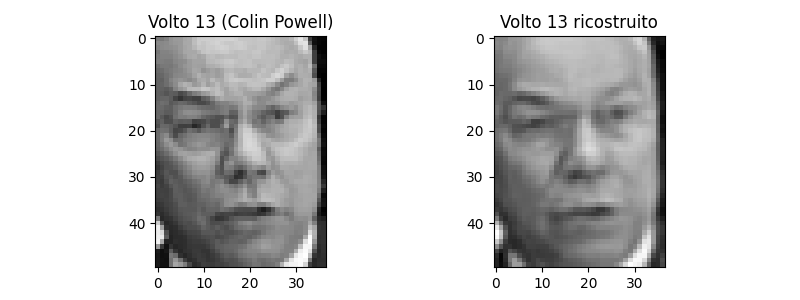

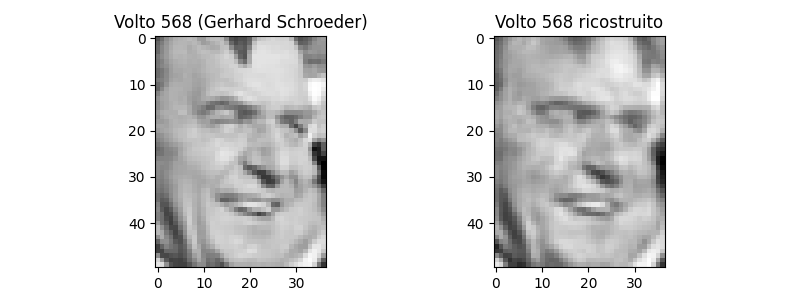

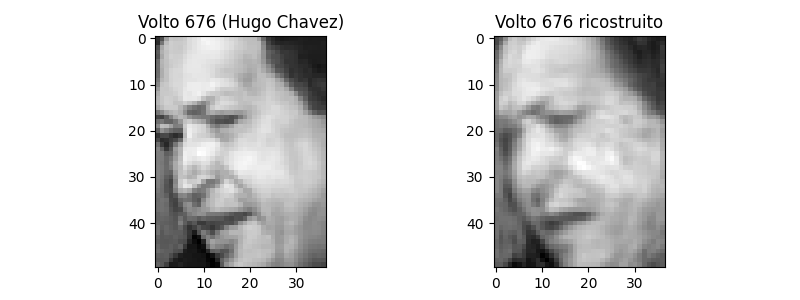

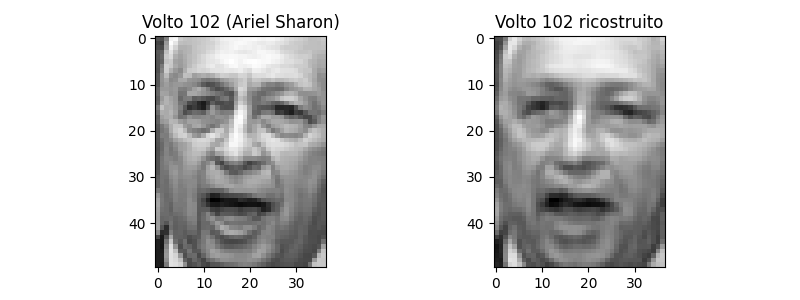

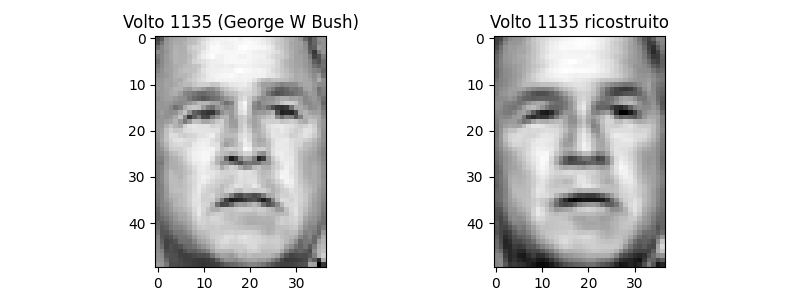

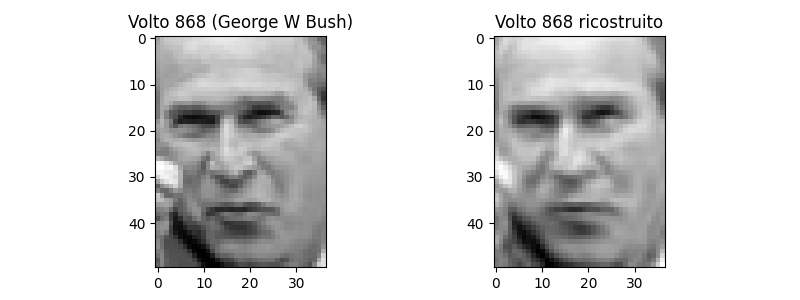

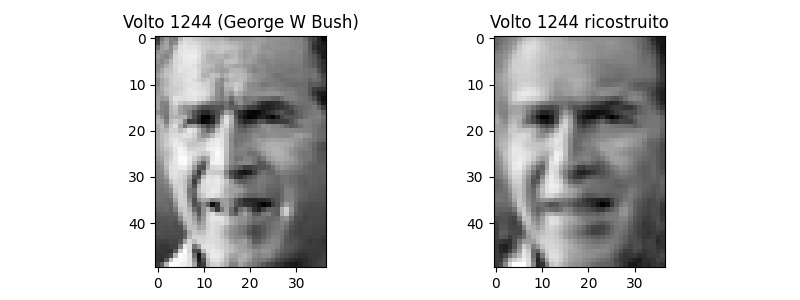

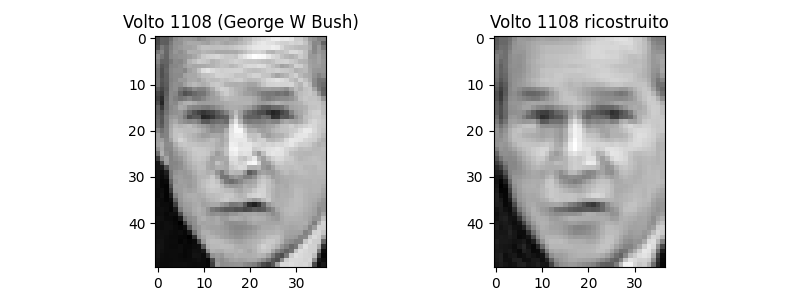

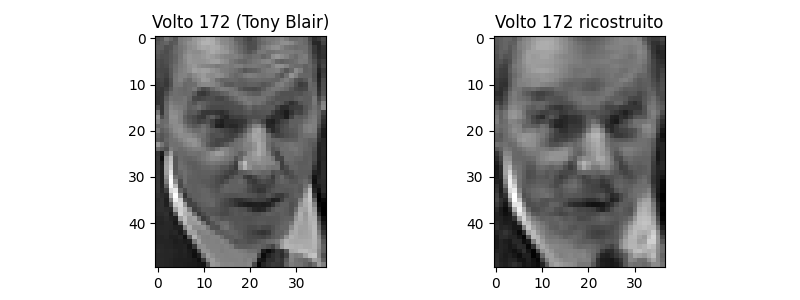

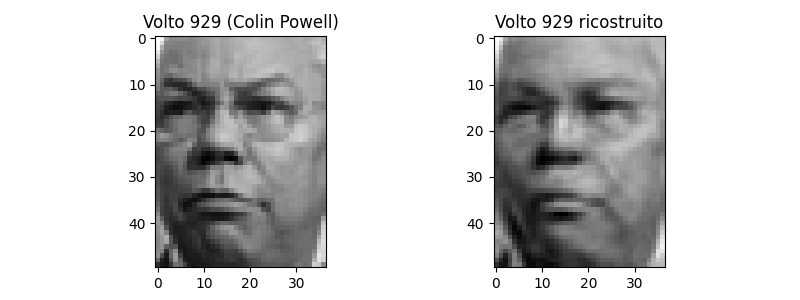

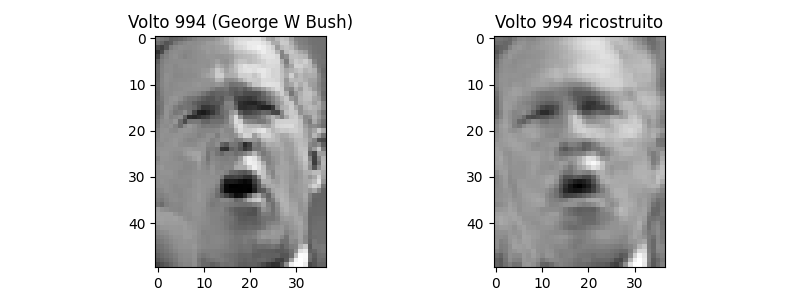

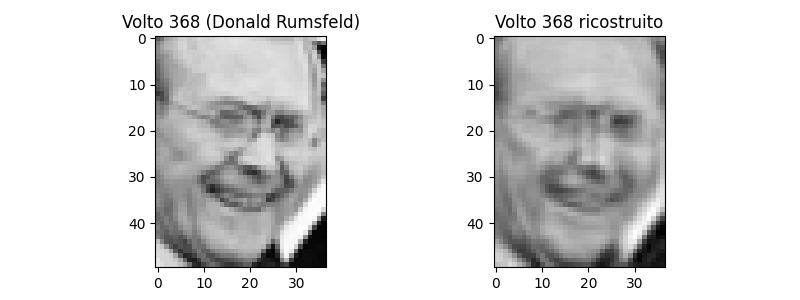

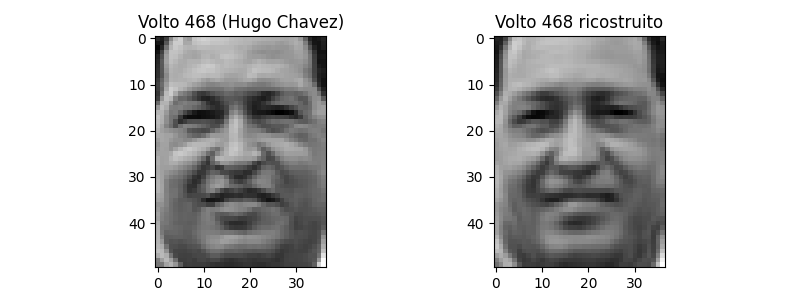

In [18]:
# Selezione di "n_randsamples" volti random dal dataset

n_randsamples = 25
i_rand = np.random.choice(face_data.shape[0], n_randsamples, replace=False)

# Matrice delle n_randsamples volti scelti (una riga, un volto)
rand_faces = face_data[i_rand, :]

# Definire la matrice "built_randfaces" rappresentante la matrice rand_faces ricostruita tramite le PC.
# SUGGERIMENTO: usare i metodi "transform" e "inverse_transform" della PCA. 
built_randfaces = pca.inverse_transform(pca.transform(rand_faces))

print('Sample Indices: {}'.format(i_rand))

for i in range(n_randsamples):
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    ii = i_rand[i]
    face_ii = face_images[ii]
    builtface_ii = built_randfaces[i, :]
    builtface_ii = builtface_ii.reshape((height, width))
    
    axs[0].imshow(face_ii, cmap=plt.cm.gray)
    axs[0].set_title('Volto {} ({})'.format(ii, face_targets_df.loc[ii, 'target_names']))
    
    axs[1].imshow(builtface_ii, cmap=plt.cm.gray)
    axs[1].set_title('Volto {} ricostruito'.format(ii))
    
plt.show()